In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.optimize import curve_fit

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
thefiles = ["Ели_мужики_рагу_смертью запивали_и_на_хрен_дектрозу_всю_они_намазывали.txt", "Карамельные_вперёд.txt"]

lin_f = lambda t, A, B: t*A + B

       m   mv_1  mv_2  angle_length  angle_width
0    0.0   0.30   0.3           300        300.0
1   10.0   2.85   0.4           293        299.0
2   21.0   9.90   0.7           285        298.0
3   32.2  16.80   1.0           277        297.0
4   43.2  22.00   1.6           271        295.5
5   54.3  16.80   3.4           266        294.0
6   65.4  21.30   3.4           259        292.5
7   76.4  25.80   4.2           254        291.0
8   87.4  22.20   NaN           247          NaN
9   87.4    NaN   NaN           255          NaN
10  98.7  18.00   NaN           249          NaN
[0.0312445  1.91971479]
       m  angle_length
0  11.11           309
1  22.22           318
2  33.72           326
3  45.72           335
[0.01486542 0.46085904]


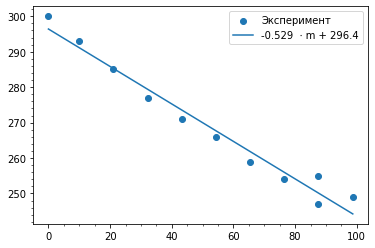

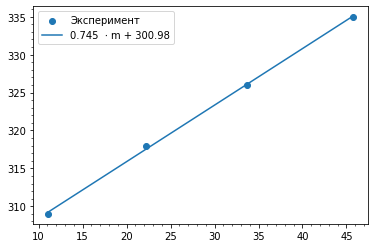

In [27]:
for f in thefiles:
    text = open(f, encoding="utf-8").read()
    df = pd.read_csv(open(f, encoding="utf-8"), delimiter=" ", comment="#")
    
    fig, ax = plt.subplots(1, 1)
    #ax.set_title(f[:-4])
    df["m"] = np.cumsum(df["m"])
    print(df)
    ax.minorticks_on()
    
    ax.scatter(df["m"], df["angle_length"], label="Эксперимент")
    res, err = curve_fit(lin_f, df["m"], df["angle_length"])
    ax.plot(df["m"], lin_f(df["m"], *res), label=f"{round(res[0], 3)}  ⋅ m + {round(res[1], 2)}")
    print(np.sqrt(np.diag(err)))
    
    ax.legend()
    
    fig.savefig(f[:-4] + '_angle_length.jpg', dpi=100)
    
    #ax.scatter(df[0], df[1])
    #ax.set_xlabel("λ, нм")

In [17]:
f = "Ели_мужики_рагу_смертью запивали_и_на_хрен_дектрозу_всю_они_намазывали.txt"

In [20]:
text = open(f, encoding="utf-8").read()
df = pd.read_csv(open(f, encoding="utf-8"), delimiter=" ", comment="#")

#ax.set_title(f[:-4])
df["m"] = np.cumsum(df["m"])

[1.24357261e-02 3.90154088e+01]
[0.00795763 4.11215846]
[0.00430146 0.19538918]


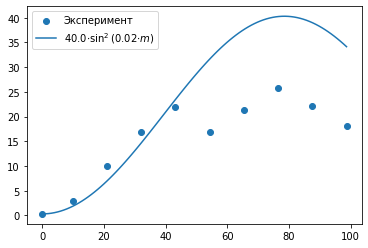

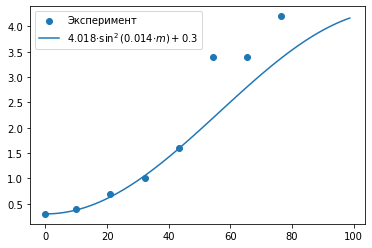

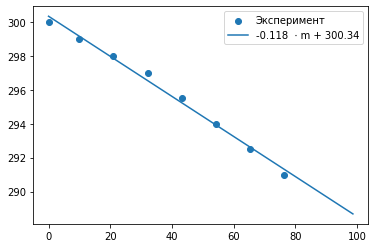

In [24]:
x = np.array(df['m'])

for col in ["mv_1", "mv_2", "angle_width"]:
    
    if col == "angle_width":
        lin_f = lambda t, A, B: t*A + B
    else:
        lin_f = lambda t, A, B: B*np.sin(A*t)**2 + 0.3
    
    fig, ax = plt.subplots(1, 1)
    dat = df[col]
    
    ax.scatter(df["m"], df[col], label="Эксперимент")
    
    mask = dat == dat
    if col == "angle_width":
        res, err = curve_fit(lin_f, x[mask], dat[mask])
    else:
        res, err = curve_fit(lin_f, x[mask][:5], dat[mask][:5], bounds=((0, 0), (1/50, 40)))
    print(np.sqrt(np.diag(err)))
    label = f"{round(res[0], 3)}  ⋅ m + {round(res[1], 2)}" if col == "angle_width" else f"${round(res[1], 3)} ⋅ \sin^2({round(res[0], 3)}⋅m)$"
    if col == "mv_2":
        label = f"${round(res[1], 3)} ⋅ \sin^2({round(res[0], 3)}⋅m) + 0.3$"
    X = np.linspace(0, np.max(x), 100)
    ax.plot(X, lin_f(X, *res), label=label)
    
    ax.legend()
    
    fig.savefig(f[:-4] + f'_{col}.jpg', dpi=100)